In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

# Histograma (y density plot)

**¿Qué es un Histograma?**

Un histograma es un tipo de gráfico que nos permite visualizar la distribución de una variable numérica utilizando un conjunto de barras. Cada barra representa un rango determinado de valores, y la altura de una barra en particular representa el número de datos en el DataFrame que pertenecen al rango de valores asociados a esa barra.

**¿Qué es un density plot?**

Es una versión suave del histograma.




## ¿Para qué sirven los histogramas?

Los histogramas son muy útilies para observar características distribucionales relativas al conjunto de datos. Algunas de las características que podemos observar en los datos son:
1. Simetría
2. Unimodalidad
3. Asimetría hacia la izquierda o derecha
4. Bimodalidad o Multimodalidad
5. Distribución uniforme.


## Distribución simétrica y unimodal:

In [16]:
mu = 0 #mean
sigma = 1 #stddev
sample = 1000
np.random.seed(0)
x = np.random.normal(mu, sigma, sample)

(array([  2.,   5.,   5.,   7.,  12.,  28.,  31.,  48.,  61.,  86.,  84.,
         93., 107.,  89.,  87.,  66.,  59.,  39.,  35.,  19.,  17.,  10.,
          7.,   3.]),
 array([-3.04614305, -2.8042473 , -2.56235154, -2.32045578, -2.07856003,
        -1.83666427, -1.59476851, -1.35287276, -1.110977  , -0.86908124,
        -0.62718548, -0.38528973, -0.14339397,  0.09850179,  0.34039754,
         0.5822933 ,  0.82418906,  1.06608481,  1.30798057,  1.54987633,
         1.79177209,  2.03366784,  2.2755636 ,  2.51745936,  2.75935511]),
 <BarContainer object of 24 artists>)

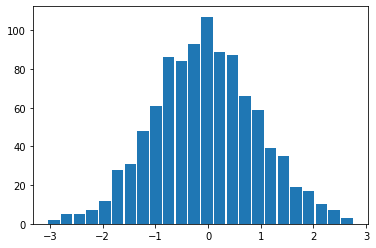

In [17]:
import matplotlib.pyplot as plt

# rwidth permite que las barras no estén pegadas
plt.hist(x,bins=24, rwidth=0.9)

## Asimetría hacia la izquierda: 

1. La cola de la distribución apunta hacia la izquierda


In [18]:
mu = 2 #mean
sigma = 2 #stddev
sample = 1000
np.random.seed(0)
x = np.random.gamma(mu, sigma, sample)*-1

(array([  2.,   1.,   3.,   2.,   4.,   3.,   0.,   3.,   5.,   9.,  13.,
          9.,  12.,  18.,  18.,  33.,  46.,  42.,  64.,  82.,  88.,  97.,
         94., 112., 112.,  87.,  41.]),
 array([-16.26600033, -15.6661649 , -15.06632948, -14.46649406,
        -13.86665863, -13.26682321, -12.66698778, -12.06715236,
        -11.46731694, -10.86748151, -10.26764609,  -9.66781066,
         -9.06797524,  -8.46813982,  -7.86830439,  -7.26846897,
         -6.66863355,  -6.06879812,  -5.4689627 ,  -4.86912727,
         -4.26929185,  -3.66945643,  -3.069621  ,  -2.46978558,
         -1.86995015,  -1.27011473,  -0.67027931,  -0.07044388]),
 <BarContainer object of 27 artists>)

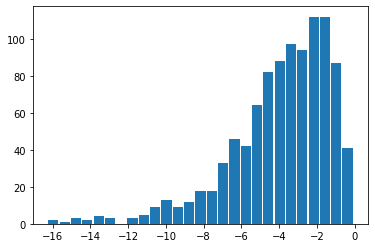

In [19]:
plt.hist(x, bins=27, rwidth=0.9)

## Asimetría hacia la derecha: 

1. La cola de la distribución apunta hacia la derecha

In [20]:
mu = 3 #mean
sigma = 2 #stddev
sample = 1000
np.random.seed(0)
x = np.random.gamma(mu, sigma, sample)

(array([ 7., 46., 54., 81., 89., 91., 70., 86., 78., 82., 59., 44., 51.,
        34., 29., 14., 20., 10.,  9., 12.,  8.,  7.,  3.,  1.,  2.,  5.,
         2.,  3.,  1.,  2.]),
 array([ 0.39909766,  1.04828369,  1.69746973,  2.34665576,  2.99584179,
         3.64502783,  4.29421386,  4.94339989,  5.59258593,  6.24177196,
         6.89095799,  7.54014402,  8.18933006,  8.83851609,  9.48770212,
        10.13688816, 10.78607419, 11.43526022, 12.08444626, 12.73363229,
        13.38281832, 14.03200436, 14.68119039, 15.33037642, 15.97956245,
        16.62874849, 17.27793452, 17.92712055, 18.57630659, 19.22549262,
        19.87467865]),
 <BarContainer object of 30 artists>)

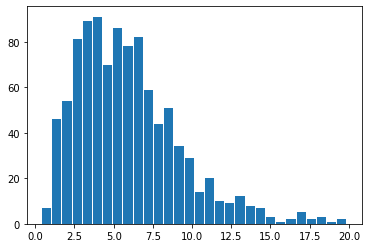

In [21]:
plt.hist(x, bins=30, rwidth=0.9)

## Bimodalidad (Multimodalidad): 

1. Ocurre cuando observamos dos modas en el histograma
2. Los datos multimodales consideran dos o más modas

In [22]:
aux1 = np.random.normal(-2, 0.5, 1000)
aux2 = np.random.normal(2, 1, 1000)
df = pd.DataFrame(np.concatenate((aux1, aux2)), columns=["x"])

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

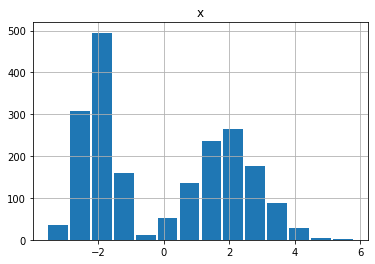

In [23]:
# Ojo, aquí estamos usando Pandas para graficar
df.hist(bins=14, rwidth=0.9)

## Distribución uniforme

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

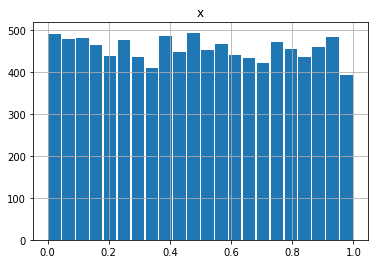

In [24]:
df = pd.DataFrame(np.random.uniform(0, 1, 10000), columns=["x"])
df.hist(bins = 22, rwidth=0.9)

## Construcción de un histograma

Para esta parte vamos a retomar los datos de automóviles. Empezamos cargando esta base de datos.


  Número |Nombre  | Descripción 
---------|--------|------------------
 1       |mpg     | Miles/(US) gallon
 2       |cyl     | Number of cylinders
 3       |disp    | Displacement (cu.in.)
 4       |hp      | Gross horsepower
 5       |drat    | Rear axle ratio
 6       |wt      | Weight (1000 lbs)
 7       |qsec    | 1/4 mile time
 8       |vs      | Engine (0 = V-shaped, 1 = straight)
 9       |am      |Transmission (0 = automatic, 1 = manual)
 10      |gear    | Number of forward gears
 11      |carb    |Number of carburetors


In [44]:
from pydataset import data

mtcars = data("mtcars")
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Nuestro primer histograma
Construiremos un histograma para la variable ``hp``, que señala los caballos de fuerza del automóvil. Para hacer nuestros histogramas utilizaremos `seaborn`. Recordemos que `seaborn` es una librería de visualización de datos para Python desarrollada sobre `matplotlib` que ofrece una interfaz de alto nivel para la creación de gráficos.

Vamos a usar la función  `sns.histplot()` para hacer nuestro histograma. Esta función recibe los siguientes argumentos:

- `data`: pandas.DataFrame, numpy.ndarray, mapping, or sequence
- `x, y`: vectores or keys en los datos
- `color`: controla el color con que pintamos las barras del histograma
- `alpha`: parámetro de transparencia
- `bins`: controla el número de barras.


Para más detalles, podemos ver [la documentación oficial](https://seaborn.pydata.org/generated/seaborn.histplot.html). Además, existen dos tipos de histogramas que podemos construir:

1. **Histograma de frecuencias:** La altura de las barras representa la frecuencia de elementos que pertenecen a dicha barra.

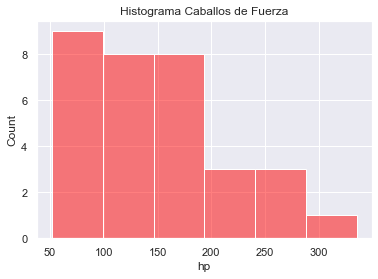

In [31]:
sns.set_theme()
sns.histplot(data=mtcars, x="hp", bins=6, color="red", alpha=0.5) 
plt.title('Histograma Caballos de Fuerza');

2. **Histograma de densidad:** gráfico donde la suma del área de  las barras es igual a 1.

Para decirle a seaborn que queremos un gráfico de densidad, le pasamos el siguiente argumento: `stat="density"`. Esto lo hacemos en la funcion `sns.histplot`.

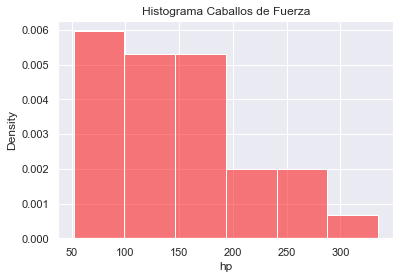

In [36]:
sns.set_theme()
sns.histplot(data=mtcars, x="hp",  color="red", stat="density", alpha=0.5)
plt.title('Histograma Caballos de Fuerza');

## Density plot

Además, si queremos añadir una linea correspondiente a la función de densidad podemos agregar el argumento `kde=True`. 

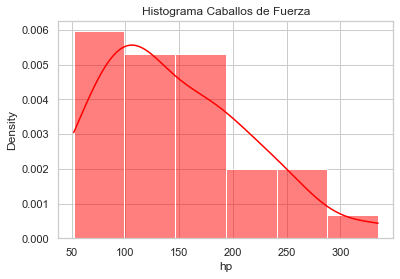

In [38]:
sns.set_theme
sns.histplot(data=mtcars, x="hp", bins=6, color="red", stat="density", alpha=0.5, kde=True)
plt.title('Histograma Caballos de Fuerza');

## Dos o más histogramas

Para ver este ejemplo, vamos a cambiar los valores del campo `am` por Automático y Manual respectivamente.

In [45]:
# En este módulo reemplazamos los 0 y 1 por Automático y Manual respectivamente.
mtcars['am'] = mtcars['am'].map({0: 'Automático', 1: 'Manual'})

Para mostrar dos o más histogramas (para dos o más grupos) en un mismo gráfico, usamos el parametro `hue`, que determina cuál columna en los datos va a ser usada para determinar el color (por grupo) de los elementos del gráfico.

<AxesSubplot:xlabel='hp', ylabel='Density'>

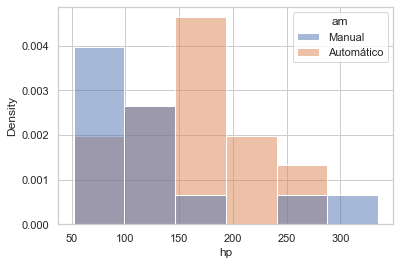

In [46]:
sns.histplot(data=mtcars, x="hp", hue="am", stat="density")

Sin embargo, notamos que el histograma no es muy claro. Quizás mejores opciónes son:

* **Opción 1**: Graficar solamente las densidades, para esto utilizaremos **KDE** (Kernel Density Estimate), que como ya mencionamos, es usado para visualizar la densidad de probabilidad de una variable continua.

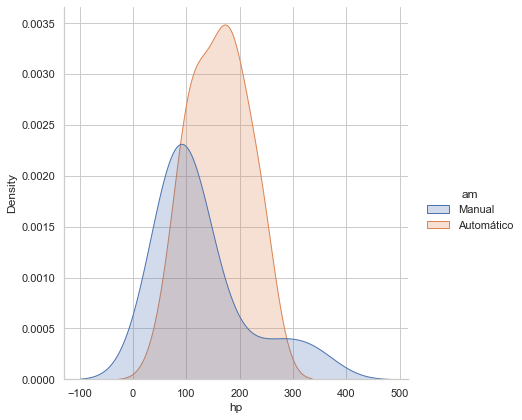

In [47]:
ax = sns.displot(mtcars, x="hp", hue="am", kind="kde", fill=True,height=6 );

Notemos que aquí los valores van más allá de los límites del gráfico original, ya que se intenta encontrar una función de densidad para esos datos. El área bajo la curva de estas densidades es 1.

- **Opción 2**: podemos usar `sns.displot` con el argumento `multiple="stack"`.

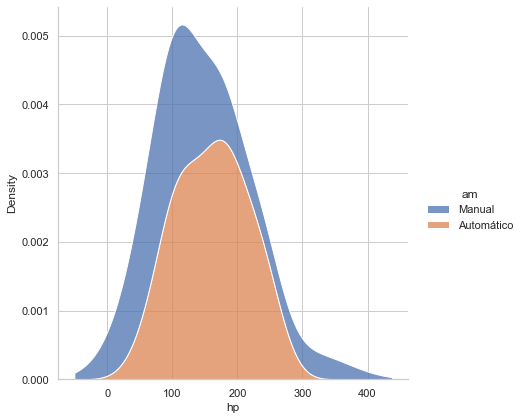

In [48]:
g = sns.displot(mtcars, x="hp", hue="am", kind="kde", multiple="stack", height=6)

## Bonus

La función `pairplot` de `seaborn` nos permite comparar columnas numéricas entre sí (mediante _scatter plots_).

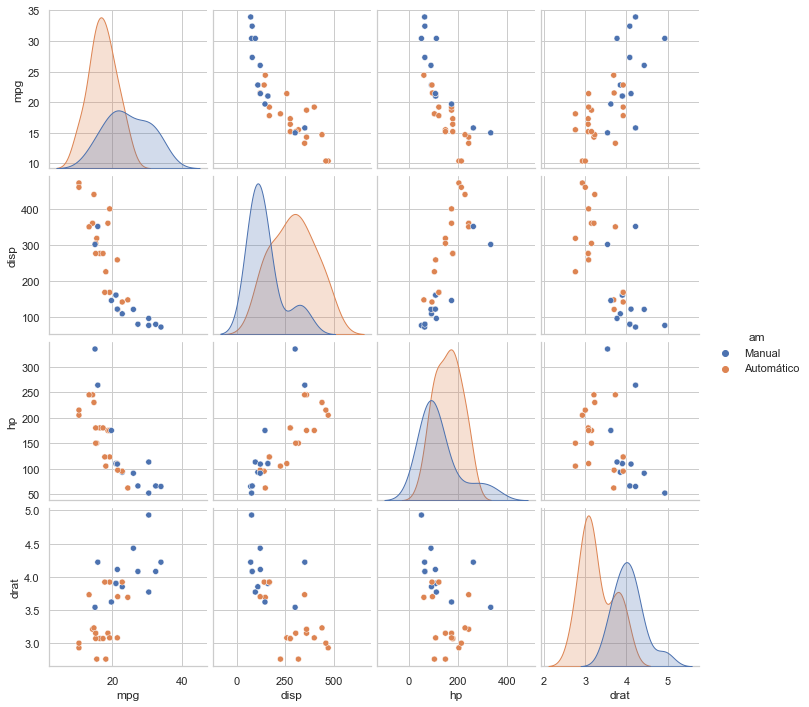

In [49]:
sns.pairplot(mtcars[["mpg", "disp", "hp", "drat", "am"]], hue="am")

 Además, en la diagonal, nos genera el histograma de la variable. Como podrás suponer, esta función es muy útil para hacer un análisis exploratorio de un _dataset_.